In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
import warnings

# Set the random seed for reproducibility
np.random.seed(42)

In [42]:
# Load the data
df = pd.read_csv('data1_train.csv')

In [43]:
# Basic data exploration
print(df.head())

    Feature_1  Feature_2   Feature_3  Target
0   94.870985  88.239326  101.497093       0
1   97.684482  84.837474   90.892151       0
2   94.648343  77.467282   87.646104       0
3   94.635471  85.327735   99.851568       0
4  104.397011  84.097116   98.211326       0


In [44]:
print(df.shape)

(800, 4)


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  800 non-null    float64
 1   Feature_2  800 non-null    float64
 2   Feature_3  800 non-null    float64
 3   Target     800 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 25.1 KB
None


In [46]:
print(df.isnull().sum())

Feature_1    0
Feature_2    0
Feature_3    0
Target       0
dtype: int64


In [47]:
print(df.describe())

        Feature_1   Feature_2   Feature_3      Target
count  800.000000  800.000000  800.000000  800.000000
mean    93.865307   78.370452   86.557571    1.012500
std      8.264920    5.420918    8.413439    0.820479
min     71.718690   63.794491   67.089600    0.000000
25%     86.570167   74.572013   79.539101    0.000000
50%     96.075213   77.986860   87.877314    1.000000
75%    100.394055   81.823563   93.050799    2.000000
max    111.952780   95.780956  107.830983    2.000000


In [48]:
print(df.corr()['Target'])

Feature_1    0.056738
Feature_2   -0.601941
Feature_3   -0.848050
Target       1.000000
Name: Target, dtype: float64


In [49]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='Feature_1', y='Feature_2', z='Feature_3', color='Target')
fig.show()

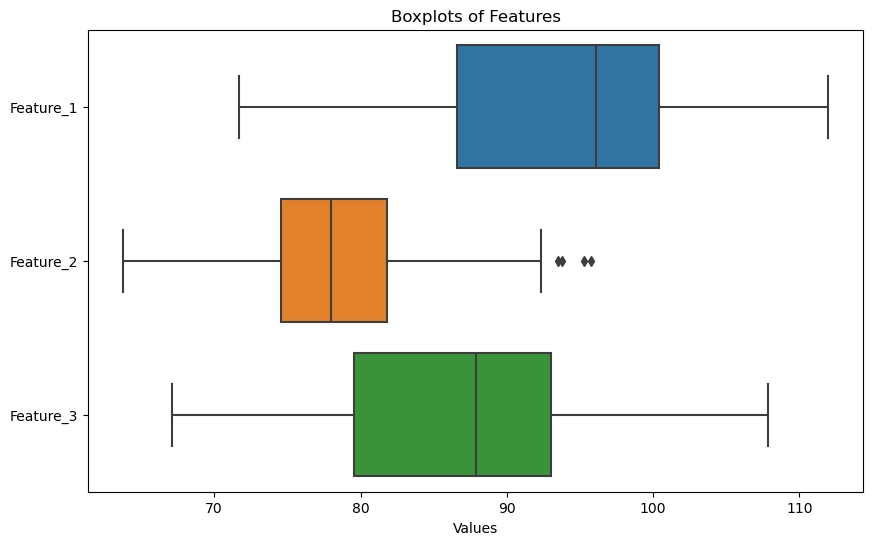

In [50]:
# Boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Target']), orient='h')
plt.title('Boxplots of Features')
plt.xlabel('Values')
plt.show()

In [51]:
# Function to remove outliers
def no_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

In [52]:
# Remove outliers
df = no_outliers(df, ['Feature_1', 'Feature_2', 'Feature_3'])

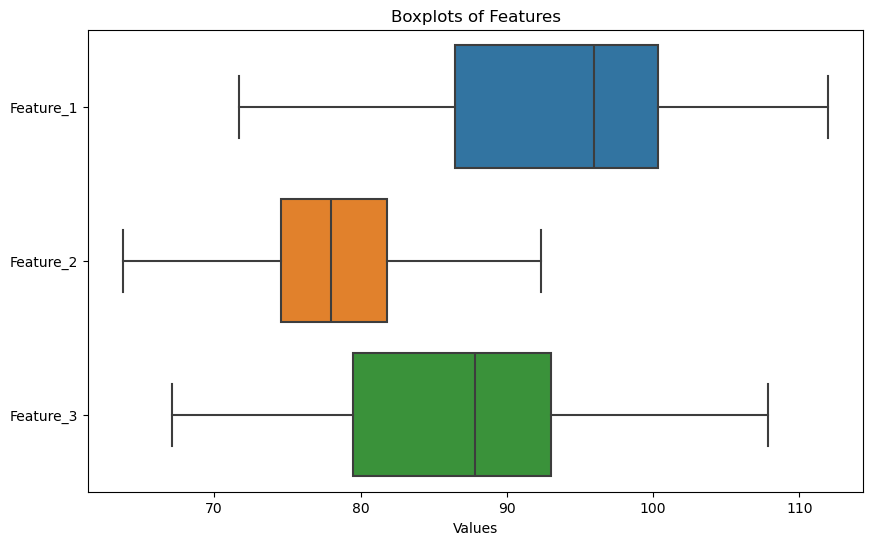

In [53]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Target']), orient='h')
plt.title('Boxplots of Features')
plt.xlabel('Values')
plt.show()

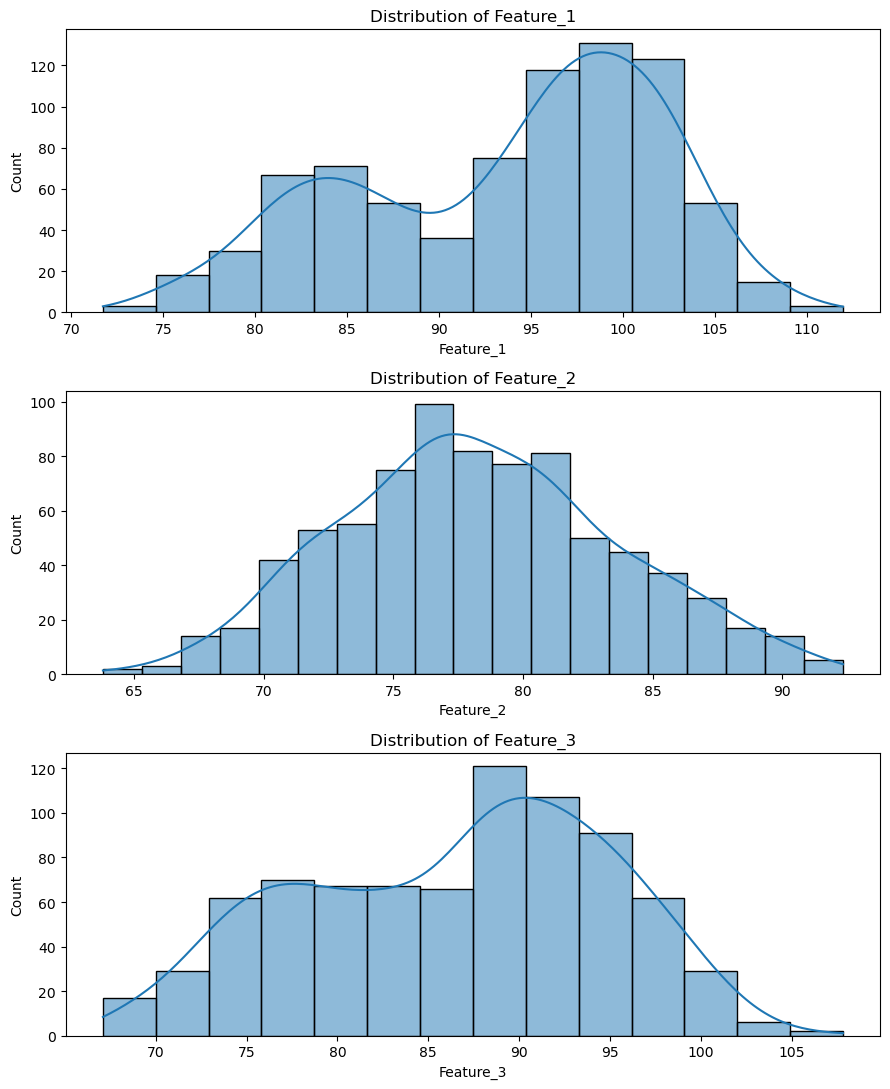

In [54]:
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot histograms of features
plt.figure(figsize=(9, 11))
plt.subplot(3, 1, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')
plt.subplot(3, 1, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')
plt.subplot(3, 1, 3)
sns.histplot(df['Feature_3'], kde=True)
plt.title('Distribution of Feature_3')
plt.tight_layout()
plt.show()

In [55]:
# Check skewness
print(df['Feature_1'].skew())
print(df['Feature_2'].skew())
print(df['Feature_3'].skew())

-0.4690760223267102
0.15455838954670664
-0.2187590457930496


In [56]:
# Apply PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[['Feature_1', 'Feature_2', 'Feature_3']] = pt.fit_transform(df[['Feature_1', 'Feature_2', 'Feature_3']])

In [57]:
# Check skewness again
print(df['Feature_1'].skew())
print(df['Feature_2'].skew())
print(df['Feature_3'].skew())

-0.11426424821703406
-0.00032401580019675503
-0.06054766593989175


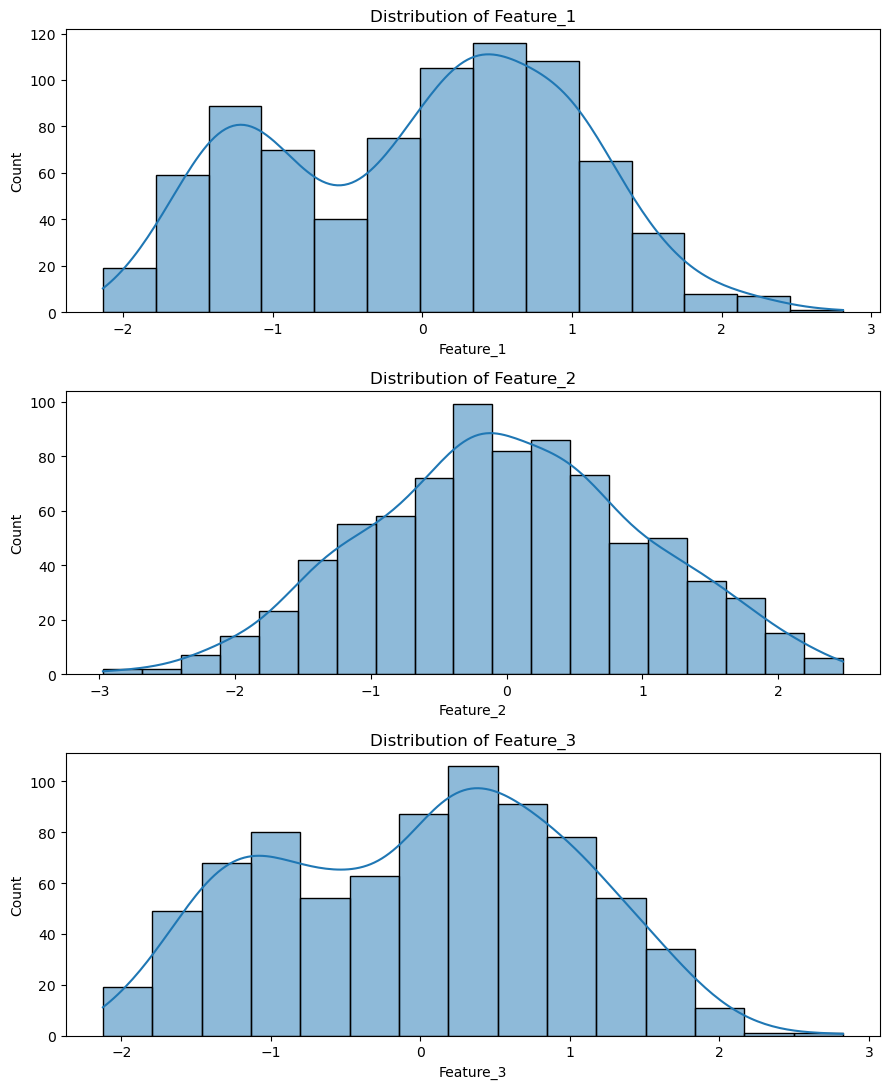

In [58]:
# Plot histograms again after transformation
plt.figure(figsize=(9, 11))

plt.subplot(3, 1, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')

plt.subplot(3, 1, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')

plt.subplot(3, 1, 3)
sns.histplot(df['Feature_3'], kde=True)
plt.title('Distribution of Feature_3')

plt.tight_layout()
plt.show()

In [59]:
# Split the data into features and target
X = df.drop(columns=['Target'])
y = df['Target']
y = pd.get_dummies(y, dtype='int')  # Removed drop_first=True

In [60]:
# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.3, random_state=45)

In [61]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [62]:
# Function to ensure data is a numpy array
def ensure_numpy_array(data):
    if isinstance(data, pd.DataFrame):
        return data.to_numpy()
    elif isinstance(data, np.ndarray):
        return data
    elif isinstance(data, (pd.Series, list)):
        return np.array(data)
    else:
        raise ValueError("Unsupported data type")

In [63]:
X_train = ensure_numpy_array(X_train)
Y_train = ensure_numpy_array(Y_train)
X_val = ensure_numpy_array(X_val)
Y_val = ensure_numpy_array(Y_val)

In [64]:
# Load and preprocess test data
df_test = pd.read_csv('data1_test.csv')

In [65]:
print(df_test.head())

    Feature_1  Feature_2  Feature_3  Target
0   97.533783  88.329103  98.191966       0
1  102.838058  78.783627  90.867559       0
2   95.155724  86.679155  94.861119       0
3  102.838797  87.504581  99.622361       0
4   99.238078  86.704614  91.685225       0


In [66]:
df_test[['Feature_1', 'Feature_2', 'Feature_3']] = pt.transform(df_test[['Feature_1', 'Feature_2', 'Feature_3']])

In [67]:
X_test = df_test.drop(columns=['Target'])
Y_test = df_test['Target']

In [68]:
Y_test = pd.get_dummies(Y_test, dtype='int')  # Removed drop_first=True

In [69]:
X_test = scaler.transform(X_test)
X_test = ensure_numpy_array(X_test)
Y_test = ensure_numpy_array(Y_test)

In [70]:
# Neural Network class
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.weights1 = np.random.rand(self.input_dim, self.hidden_dim)
        self.weights2 = np.random.rand(self.hidden_dim, self.output_dim)
        self.bias1 = np.zeros((1, self.hidden_dim))
        self.bias2 = np.zeros((1, self.output_dim))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def cross_entropy_loss(self, y_true, y_pred):
        n_samples = y_true.shape[0]
        logp = - np.log(y_pred[np.arange(n_samples), y_true.argmax(axis=1)])
        loss = np.sum(logp) / n_samples
        return loss

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = y.shape[0]
        d_loss_output = output - y
        d_output_z2 = self.sigmoid_derivative(output)
        d_z2_weights2 = self.a1.T
        d_loss_weights2 = np.dot(d_z2_weights2, d_loss_output * d_output_z2)
        d_loss_bias2 = np.sum(d_loss_output * d_output_z2, axis=0, keepdims=True)
        d_loss_a1 = np.dot(d_loss_output * d_output_z2, self.weights2.T)
        d_a1_z1 = self.sigmoid_derivative(self.a1)
        d_z1_weights1 = X.T
        d_loss_weights1 = np.dot(d_z1_weights1, d_loss_a1 * d_a1_z1)
        d_loss_bias1 = np.sum(d_loss_a1 * d_a1_z1, axis=0, keepdims=True)  # Fixed here
        self.weights1 -= self.learning_rate * d_loss_weights1
        self.bias1 -= self.learning_rate * d_loss_bias1
        self.weights2 -= self.learning_rate * d_loss_weights2
        self.bias2 -= self.learning_rate * d_loss_bias2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def hyperparameter_tuning(self, X_train, y_train, X_val, y_val, hidden_dims, learning_rates, epochs_list):
        best_acc = 0
        best_params = {}
        for hidden_dim in hidden_dims:
            for learning_rate in learning_rates:
                for epochs in epochs_list:
                    nn = NeuralNetwork(input_dim=X_train.shape[1], hidden_dim=hidden_dim, output_dim=y_train.shape[1], learning_rate=learning_rate)
                    nn.train(X_train, y_train, epochs)
                    y_pred = nn.predict(X_val)
                    acc = np.mean(y_pred == np.argmax(y_val, axis=1))
                    if acc > best_acc:
                        best_acc = acc
                        best_params = {'hidden_dim': hidden_dim, 'learning_rate': learning_rate, 'epochs': epochs}
        return best_params, best_acc

In [71]:
# Instantiate the neural network
nn = NeuralNetwork(input_dim=3, hidden_dim=4, output_dim=3, learning_rate=0.01)

In [72]:
# Hyperparameters to tune
hidden_dims = [4, 8, 16]
learning_rates = [0.01, 0.005, 0.001]
epochs_list = [1000, 2000, 3000]

In [73]:
# Hyperparameter tuning
best_params, best_acc = nn.hyperparameter_tuning(X_train, Y_train, X_val, Y_val, hidden_dims, learning_rates, epochs_list)

In [74]:
# Training final model with best hyperparameters
nn = NeuralNetwork(input_dim=3, hidden_dim=best_params['hidden_dim'], output_dim=3, learning_rate=best_params['learning_rate'])
nn.train(X_train, Y_train, best_params['epochs'])

In [75]:
# Testing final model
y_pred = nn.predict(X_test)
test_acc = np.mean(y_pred == np.argmax(Y_test, axis=1))

In [76]:
print(f"Best parameters: {best_params}")
print(f"Validation accuracy: {best_acc}")
print(f"Test accuracy: {test_acc}")

Best parameters: {'hidden_dim': 16, 'learning_rate': 0.005, 'epochs': 3000}
Validation accuracy: 0.9748953974895398
Test accuracy: 0.975


In [77]:
X_train.shape

(557, 3)

In [78]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Input

model = Sequential ([
    Input(shape=(X_train.shape[1],)),
    Dense(units = 64 , activation ='relu'),
    Dense(units = 32 , activation ='relu'),
    Dense(units = 3 , activation = 'softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_data=(X_val, Y_val))

# Step 10: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, Y_test)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.4563 - loss: 1.0170 - val_accuracy: 0.9331 - val_loss: 0.6281
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9367 - loss: 0.5470 - val_accuracy: 0.9623 - val_loss: 0.2961
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9602 - loss: 0.2545 - val_accuracy: 0.9665 - val_loss: 0.1435
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9683 - loss: 0.1287 - val_accuracy: 0.9665 - val_loss: 0.0977
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9833 - loss: 0.0832 - val_accuracy: 0.9665 - val_loss: 0.0838
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 0.0986 - val_accuracy: 0.9665 - val_loss: 0.0796
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9738 - loss: 0.0791 - val_accuracy: 0.9665 - val_loss: 0.0740
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9814 - loss: 0.0722 - val_accuracy: 0.9707 - val_los

In [80]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9750000238418579
